# rNet OceanDAO: increase DAO Health by adding dynamics to Grants system

## Research Topic/Question
- a. How can we make DAOs well functioning organisations?
    - i. Increasing DAO member (stakeholder) engagement
    - ii. Increase contributors by making Grants CAP predictable
    - iii. Balance Treasury 
- b. Can we derive assumptions of what might increase DAO's health?
    - i. Under what conditions will stakeholder participation grow?
    - ii. Under what conditions is ?

## Stakeholders

Stakeholders of DAOs are:
- Investors (Stakers)
- DAO Protocol initiators (Ambassadors)
- DAO Consumers
- DAO Producers
- DAO Intermediairies (Market Makers)
- Producer Aggregators (Unions)
- Proposal Applicants (Grantees)

- Investors
    - Stake on high performance datasets
    - Want to know what datasets are (going to be) valuable
    - Provide liquidity for an ROI
    - Unstake on poor performing datasets

- Ambassadors
    - Want to grow the ecosystem
    - Help newcomers onboard
    - Perform parameter adjustments for funding projects
    - Guide grantees in project proposals

- Consumers
    - Want good datasets for a fair price
    - Look for bargains
    - Want to be guided to curated datasets

- Producers
    - Want a fair price for their data
    - Will bargain for liquidity
    - Want to know what the market is looking for

- Market Makers
    - Want to promote datasets for market needs
    - Incentivise producers to provide by delivering needs
    - Incentivise consumers to buy by delivring curated lists of datasets

- Unions
    - Aggregate individual datasets in order to have more chance of being recognized as valuable
    - Make use of Market Makers curated lists

- Grantees ()
    - Want to earn rewards for growing the ecosystem
    - Want to know the best way for success using the rules of the DAO (Game theory)
   

### Assumptions

In this cadCAD model we define categories of stakeholders as follows:
- `dao_members` are the sum of all stakeholders in the ecosystem
- `voters` are active participants in the voting process
- `stakers` are investors looking for datasets to stake on
- `market_makers` are intermediairies connecting stakers to high quality datasets
- `builders` are developers who are thinking about applying for a grant

Furthermore, we model project categories like so:
- `new_projects` are projects entering the grant system for the first time
- `recurring_projects` are projects that already have been funded previously
subcategories of `recurring_projects` are projects according to the Ocean DAO wiki funding tier:
- `existing_projects` have received 1 or more grants
- `experienced_projects` have received 2 or more grants (between 2 and 5 grants we model 3 levels of experience)
- `veteran_projects` have received 5 or more grants

Projects can turn `unsound`, meaning they don't deliver on their proposal or in any way not according to the values of the DAO ecosystem. 
We randomize this happening.



### Policies and mechanisms (Ocean DAO)

Policies are:

#### grant_cap policy
This policy changes the `grant_cap` for each round, according to the project categories and the OceanDAO funding tier:
  ```python
  exp_projects = sum([experienced_projects['level 1'], experienced_projects['level 2'], experienced_projects['level 3']])
  grant_cap = sum([new_projects * 3, existing_projects * 10, exp_projects * 20, veteran_projects * 35])
  ```

#### projects policy
This determines the initial amount of project categories in each round, promoting projects to a higher (funding tier) category with around a 30% chance like so:
  ```python
  for i in range(s['new_projects']):
    x = random.choice(list(np.random.normal(0.3,0.05,5)))
    if random.random() < x:
      existing_projects += 1
      new_projects -= 1
  for i in range(s['existing_projects']):
    x = random.choice(list(np.random.normal(0.3,0.05,5)))
    if random.random() < x:
      experienced_projects['level 1'] += 1
      existing_projects -= 1
  etc...
  ```

#### curation policy
Projects have an increasing chance of turning unsound during the round, when results are lagging behind or plain absent. Chance for new projects is slightly higher than for recurring projects:
  ```python
    mu, sigma = 0.8 * (current_timestep - (round - 1) * timestep_per_month)/timestep_per_month, 0.1
    x = np.random.normal(mu,sigma,5)
    unsound_chance = random.choice(list(x))
    if unsound_chance > 0.65:
      if new_projects > 0:
        new_projects -= 1
        unsound_projects += 1
  ```

#### participation policy
Project category dynamics affect stakeholder behaviour. We assume that project categories affect certain stakeholder categories/stocks. Tinkering with the parameters of the flows give some reasonable results for the stocks, but very arbitrarily:
```python
    # determine the change in stakeholders
    voters = math.floor((1 + 0.1 * (growth_ratio_recurring + growth_ratio_new_entrants - growth_ratio_unsound)/3) * s['voters'])
    growth_ratio_market_makers = 0.1 * (growth_ratio_community * 2 + growth_ratio_dataset -  growth_ratio_unsound)/3
    market_makers = math.floor((1 + 0.1 * growth_ratio_market_makers) * s['market_makers'])
    stakers = math.floor((1 + 0.1 * (growth_ratio_dataset - growth_ratio_unsound)/2) * s['stakers'])
    builders = math.floor((1 + 0.1 * growth_ratio_recurring) * s['builders'])

    stakers = math.floor((1 + 0.2 * (growth_ratio_market_makers * 0.8)) * stakers)
```
E.g. we assume that 80% of `market_makers` growth accounts for 20% in `stakers` growth


In [9]:
# packages needed

%pip install radcad
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Run Model



In [1]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import enforce_typing

# Experiments
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [2]:
from model.state_variables_model1 import genesis_state
from model.partial_state_update_block_model1 import partial_state_update_block
from model.partial_state_update_block_model2 import partial_state_update_block_model2
from model.partial_state_update_block_model3 import partial_state_update_block_model3

from model.sim_setup import SIMULATION_TIME_STEPS, MONTE_CARLO_RUNS
from model.sys_params_model1 import params

running file: sim_setup.py
SIMULATION_TIME_STEPS:  451
MONTE_CARLO_RUNS:  4
end of file: sim_setup.py


In [3]:
model = Model(initial_state=genesis_state, state_update_blocks=partial_state_update_block, params=params)
model2 = Model(initial_state=genesis_state, state_update_blocks=partial_state_update_block_model2, params=params)
model3 = Model(initial_state=genesis_state, state_update_blocks=partial_state_update_block_model3, params=params)


simulation1 = Simulation(model=model, timesteps=SIMULATION_TIME_STEPS, runs=MONTE_CARLO_RUNS)
simulation2 = Simulation(model=model2, timesteps=SIMULATION_TIME_STEPS, runs=MONTE_CARLO_RUNS)
simulation3 = Simulation(model=model2, timesteps=SIMULATION_TIME_STEPS, runs=MONTE_CARLO_RUNS)

simulations = [simulation1, simulation2, simulation3]
experiment = Experiment(simulations)
# Select the Pathos backend to avoid issues with multiprocessing and Jupyter Notebooks
experiment.engine = Engine(backend=Backend.PATHOS, drop_substeps=True)

result = experiment.run()

## Interpretation of Results

In [4]:
df = pd.DataFrame(result)
df1 = df[df["simulation"] == 0]
df2 = df[df["simulation"] == 1]
df3 = df[df["simulation"] == 2]

df3

,dao_members,voters,stakers,builders,market_makers,grant_cap,treasury,projects,dataset_projects,unsound_projects,...,recurring_projects,existing_projects,experienced_projects,veteran_projects,round,simulation,subset,run,substep,timestep
10848,200,50,50,50,50,200,500,20,5,0,...,0,0,"{'level 1': 0, 'level 2': 0, 'level 3': 0}",0,1,2,0,1,0,0
10849,200,50,50,50,50,200,500,20,5,0,...,0,0,"{'level 1': 0, 'level 2': 0, 'level 3': 0}",0,1,2,0,1,4,1
10850,200,50,50,50,50,200,500,20,5,0,...,0,0,"{'level 1': 0, 'level 2': 0, 'level 3': 0}",0,1,2,0,1,4,2
10851,197,50,52,45,50,200,500,20,5,0,...,0,0,"{'level 1': 0, 'level 2': 0, 'level 3': 0}",0,1,2,0,1,4,3
10852,197,50,52,45,50,200,500,20,5,0,...,0,0,"{'level 1': 0, 'level 2': 0, 'level 3': 0}",0,1,2,0,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16267,23293,1419,21831,0,43,138,500,20,13,0,...,10,2,"{'level 1': 1, 'level 2': 1, 'level 3': 0}",0,15,2,2,4,4,447
16268,23293,1419,21831,0,43,138,500,20,13,0,...,10,2,"{'level 1': 1, 'level 2': 1, 'level 3': 0}",0,15,2,2,4,4,448
16269,23293,1419,21831,0,43,138,500,20,13,0,...,10,2,"{'level 1': 1, 'level 2': 1, 'level 3': 0}",0,15,2,2,4,4,449
16270,23434,1419,21831,0,43,170,500,22,5,0,...,12,0,"{'level 1': 2, 'level 2': 2, 'level 3': 0}",0,16,2,2,4,4,450


In [5]:
dfplot1 = df1.copy()

def reduce_experienced(exp: dict):
    return sum([exp['level 1'], exp['level 2'],exp['level 3'] ])

dfplot1["experienced_projects"] = dfplot1["experienced_projects"].apply(reduce_experienced)


In [6]:

def monte_carlo_plot(dfplot):
  # plot 3 columns for parameter sweeps new_project_ratio 0.4, 0.6, and 0.8 respectively
  dfs = [[pd.DataFrame for x in range(3)] for y in range(MONTE_CARLO_RUNS)]
  for i in range(MONTE_CARLO_RUNS):
    for j in range(3):
      dfs[i][j] = dfplot[(dfplot['run'] == i+1) & (dfplot['subset'] == j)]
      dfs[i][j].reset_index(drop=True, inplace=True)
  fig, axes = plt.subplots(nrows=22,ncols=3,figsize=(20,60))
  for j in range(3):
      flag = True
      for i in range(MONTE_CARLO_RUNS):
        if i > 0: flag = False
        dfs[i][j].plot.line(ax = axes[:,j], subplots=True, legend=flag, color=[np.random.rand(3,)])


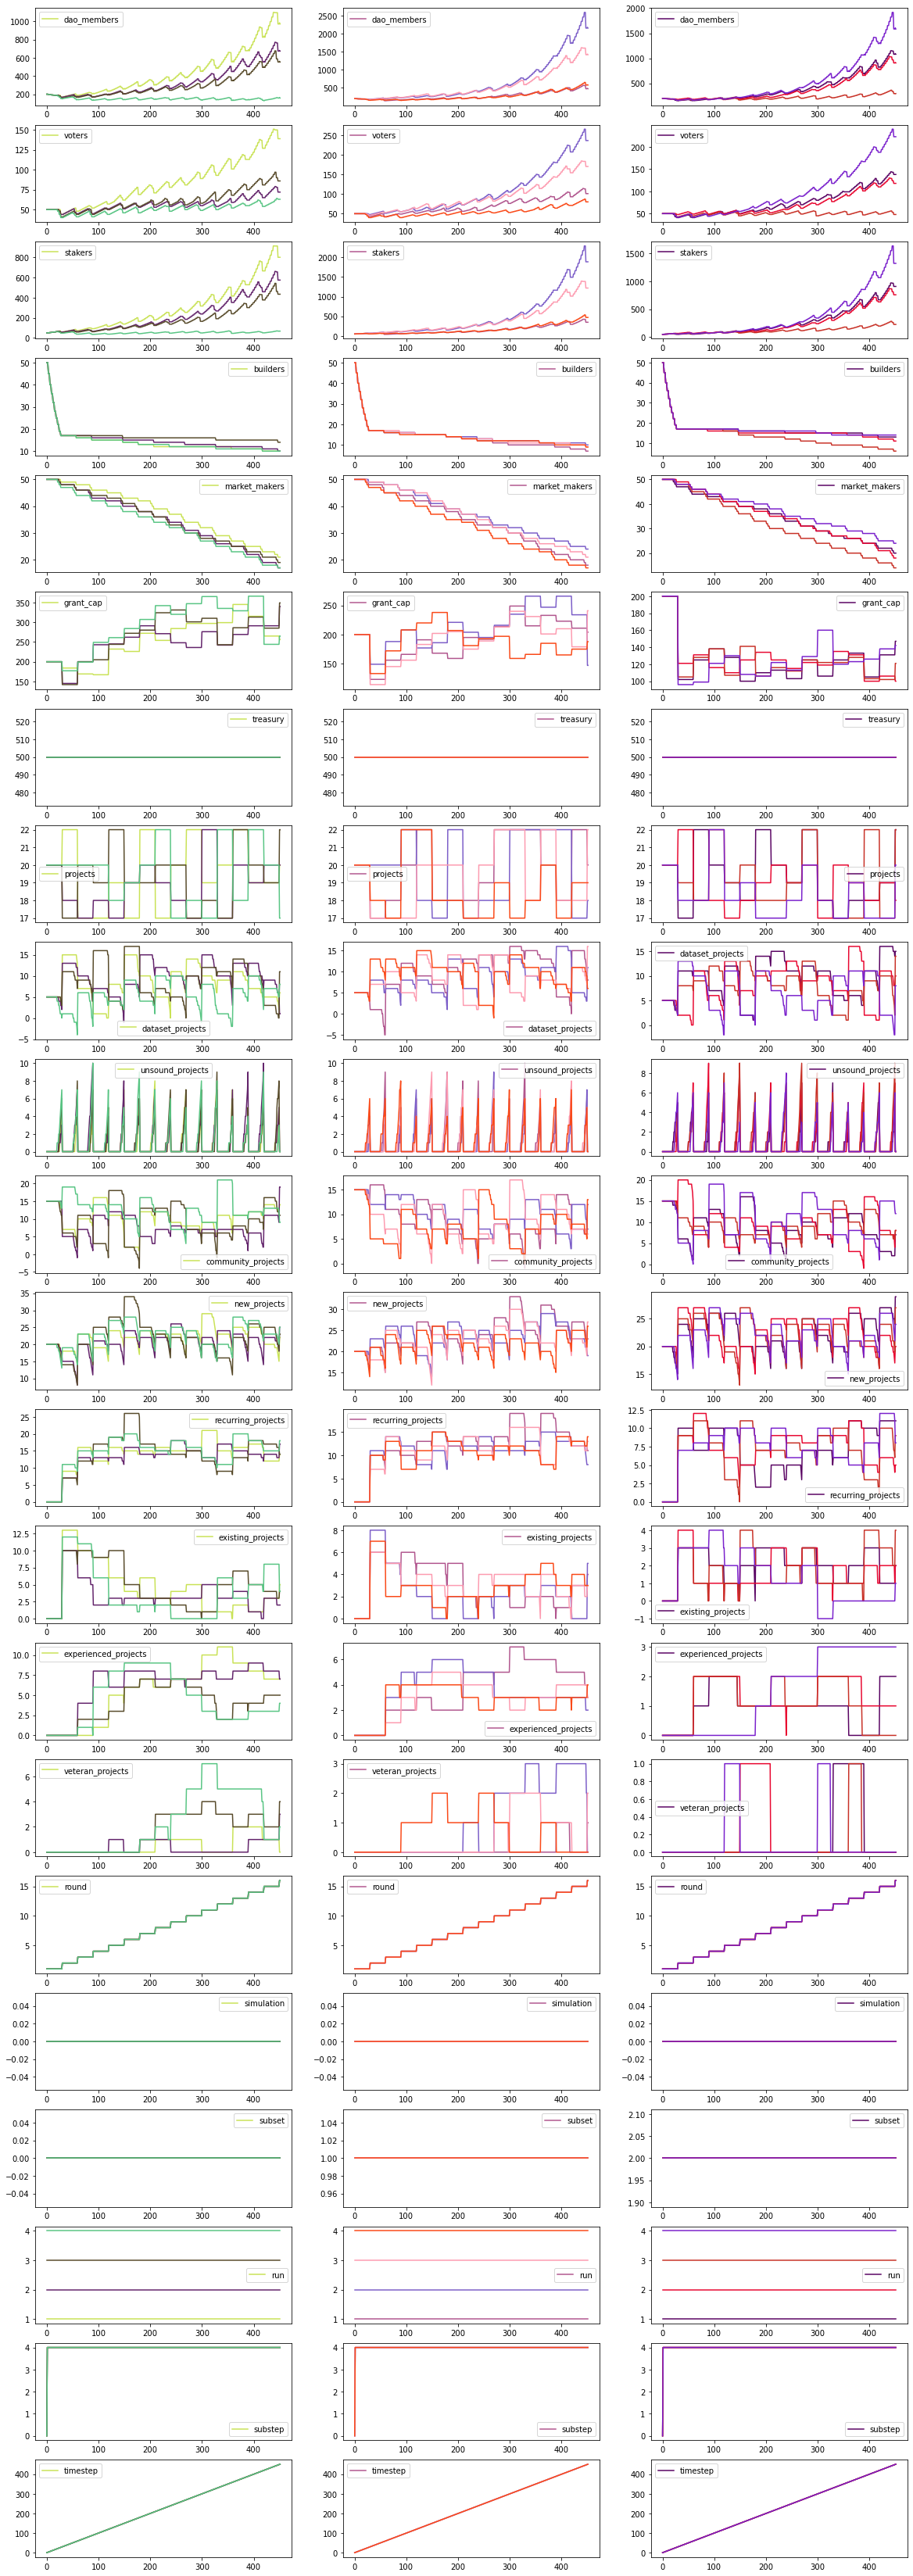

In [7]:
monte_carlo_plot(dfplot1)

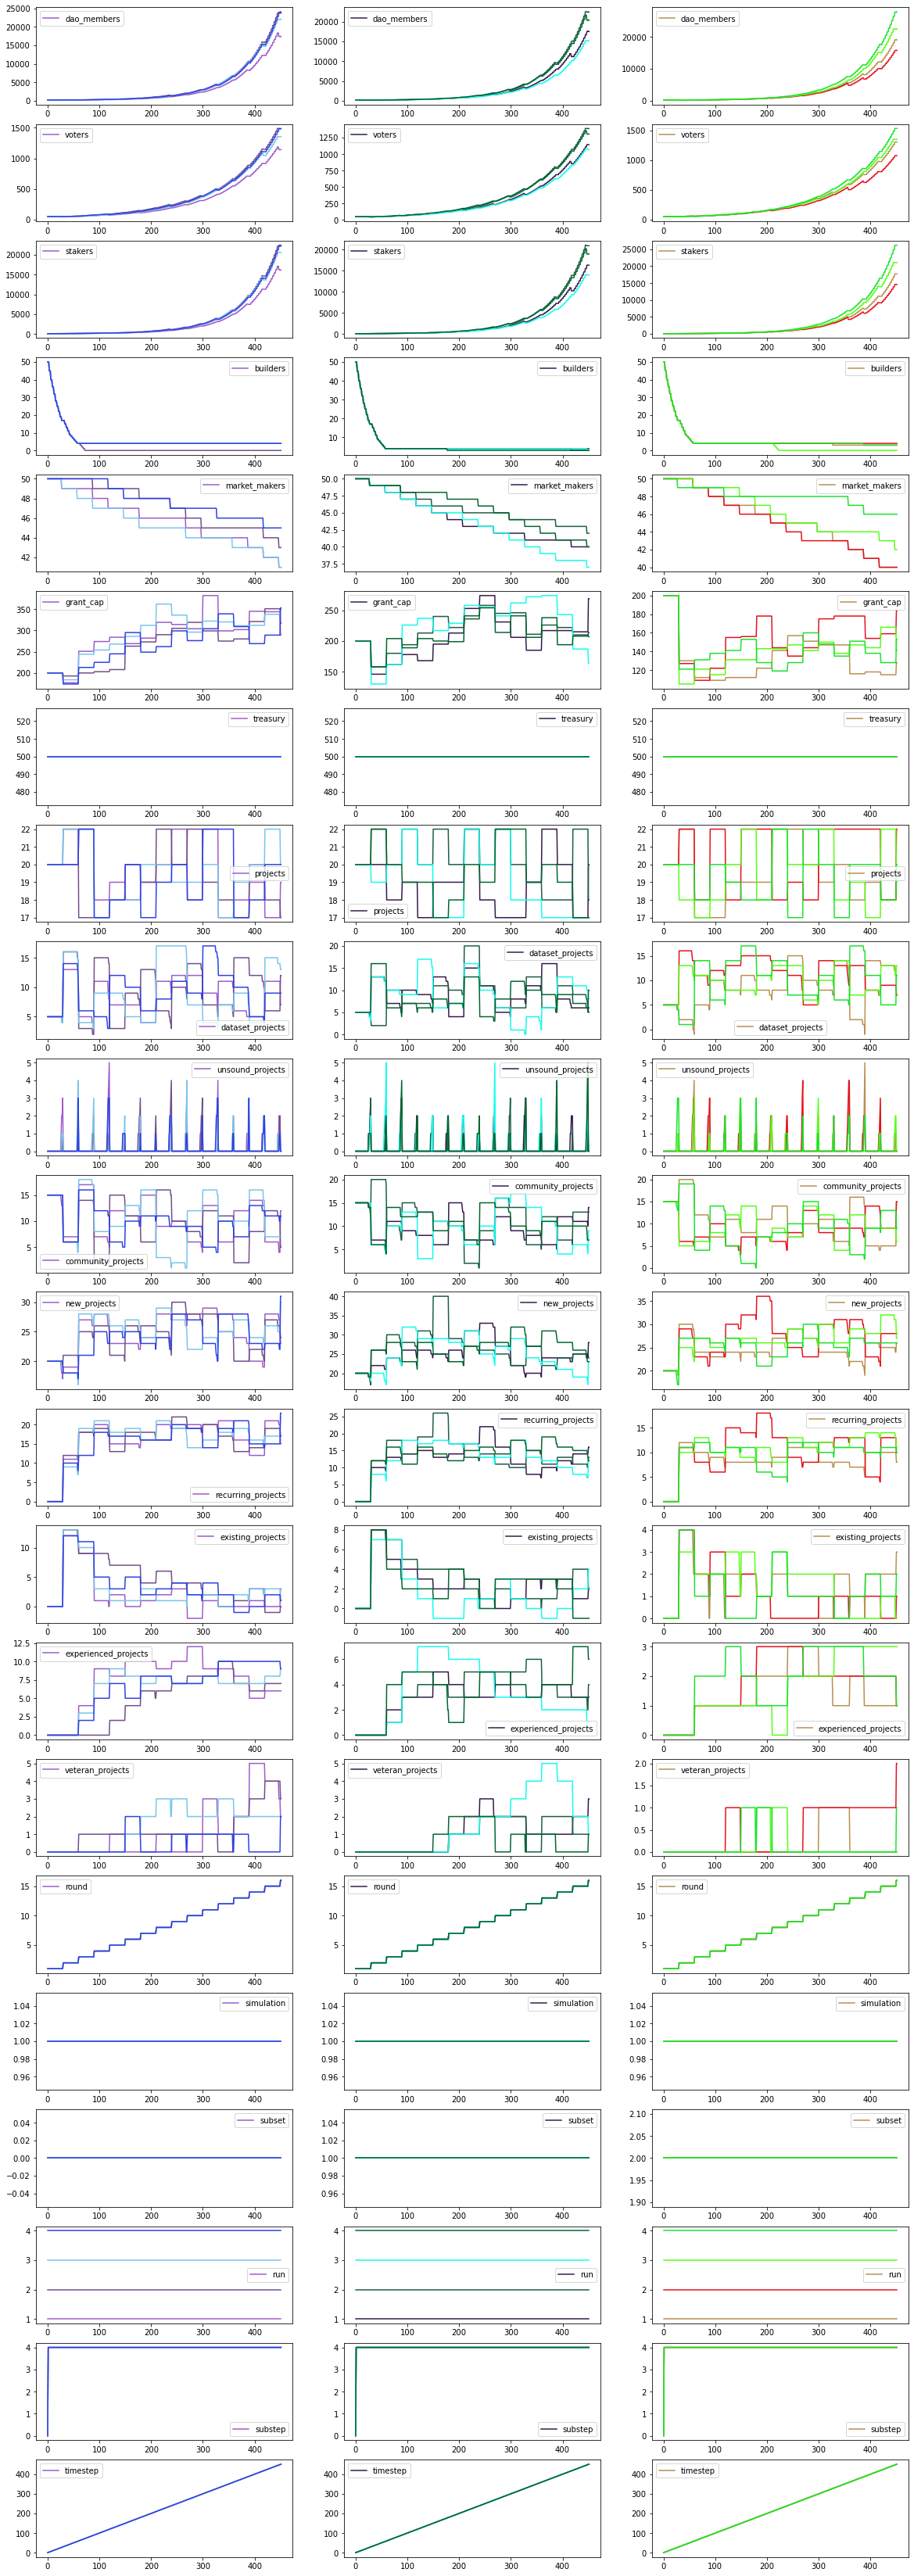

In [11]:
dfplot2 = df2.copy()

dfplot2["experienced_projects"] = dfplot2["experienced_projects"].apply(reduce_experienced)

monte_carlo_plot(dfplot2)

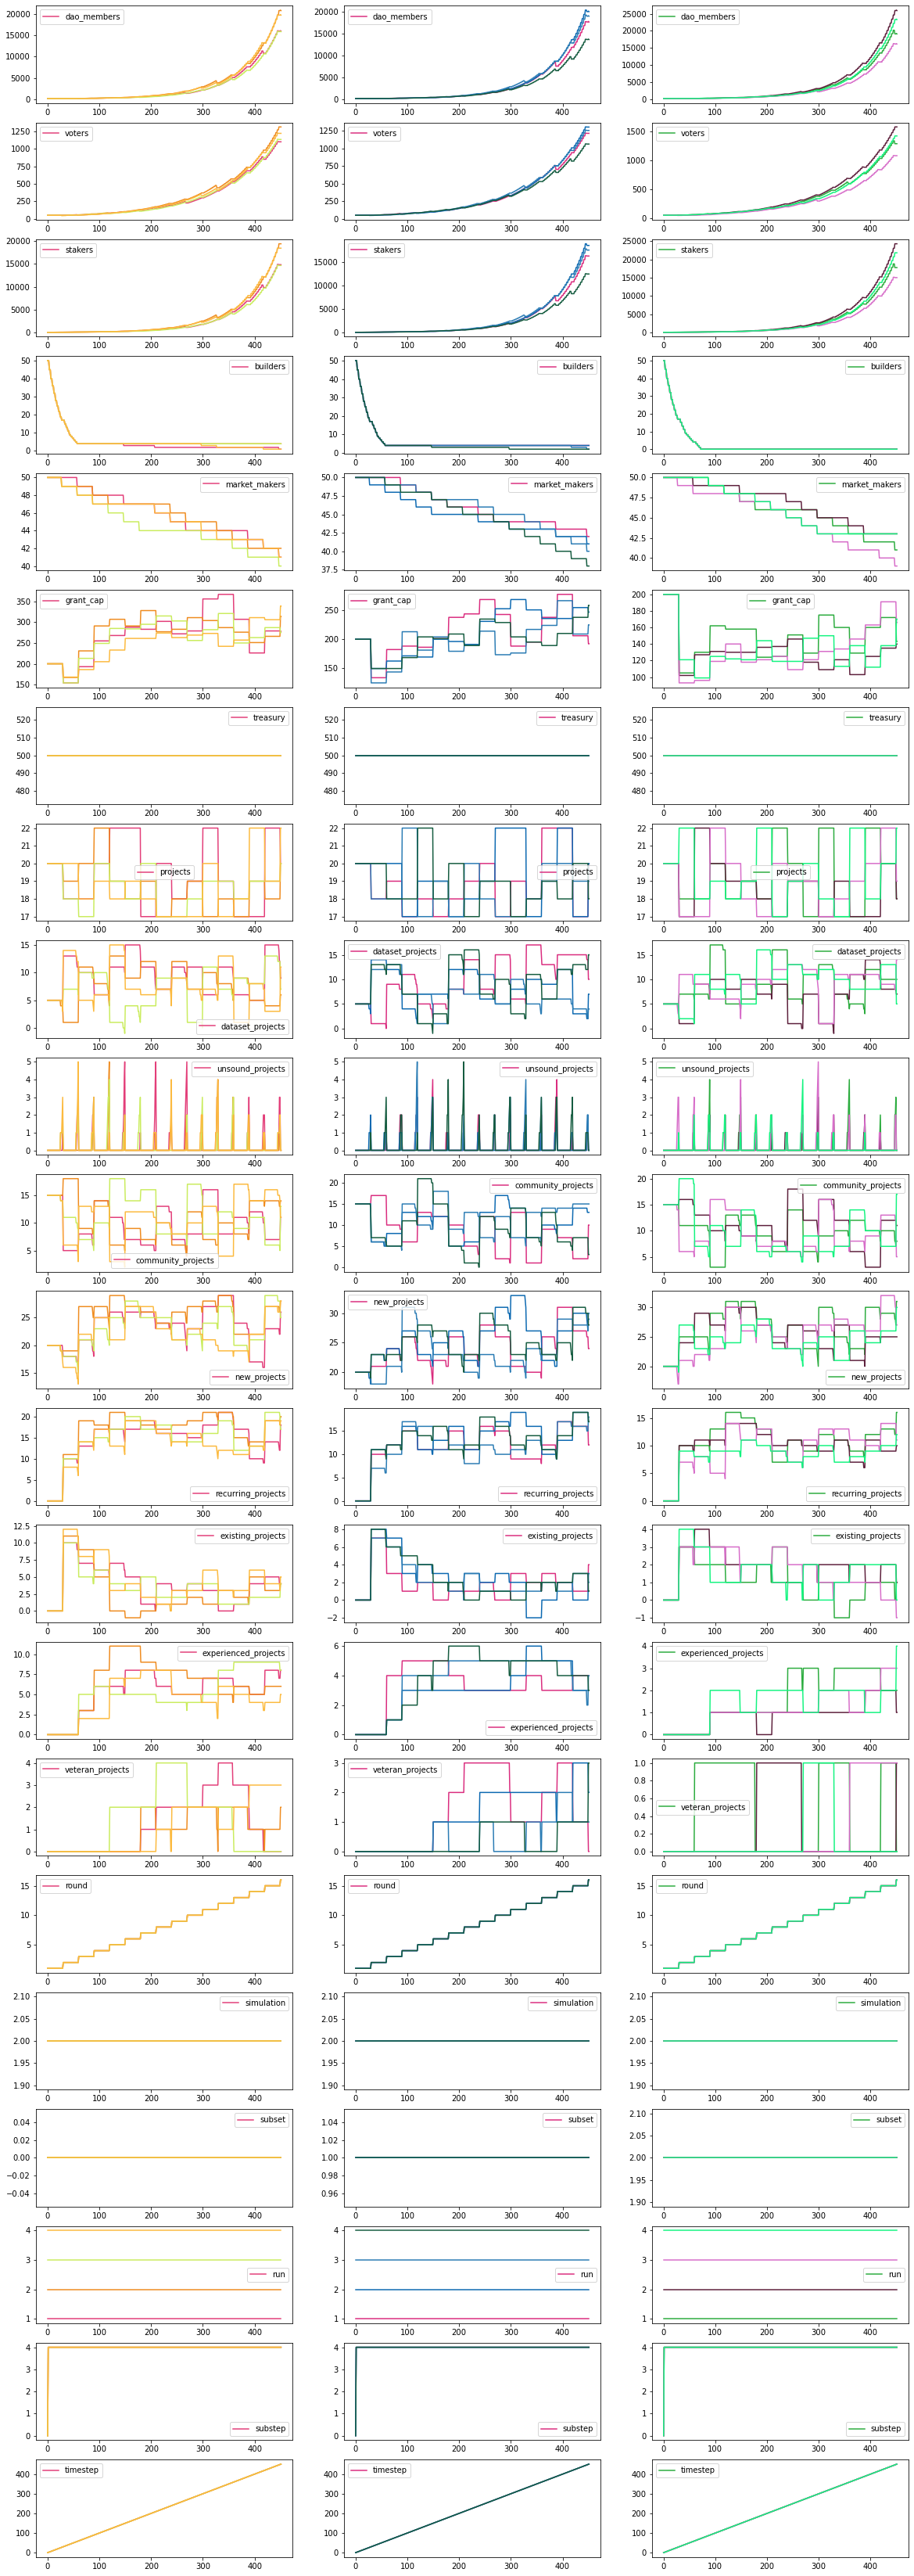

In [10]:
dfplot3 = df3.copy()

dfplot3["experienced_projects"] = dfplot3["experienced_projects"].apply(reduce_experienced)

monte_carlo_plot(dfplot3)